### Hypothesis : Income bias based on marital status

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("census.csv")

In [3]:
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'gender', 'hours_per_week',
       'native_country', 'greater_than_50k'],
      dtype='object')

In [6]:
ms = pd.concat([df[df.greater_than_50k == 1].groupby("marital_status").marital_status.count(),
              df[df.greater_than_50k == 0].groupby("marital_status").marital_status.count()],
               axis=1, sort=False)

In [7]:
ms.columns = ["marital_status_gt_50k", "marital_staus_lt_50k"]
ms.columns

Index(['marital_status_gt_50k', 'marital_staus_lt_50k'], dtype='object')

In [8]:
ms_calc = ms.marital_status_gt_50k / (ms.marital_status_gt_50k + ms.marital_staus_lt_50k)

In [10]:
ms_calc.sort_values(ascending=False, inplace=True)
ms_calc

marital_status
 Married-civ-spouse       0.446848
 Married-AF-spouse        0.434783
 Divorced                 0.104209
 Widowed                  0.085599
 Married-spouse-absent    0.081340
 Separated                0.064390
 Never-married            0.045965
dtype: float64

Text(0,0.5,'Percentage of People')

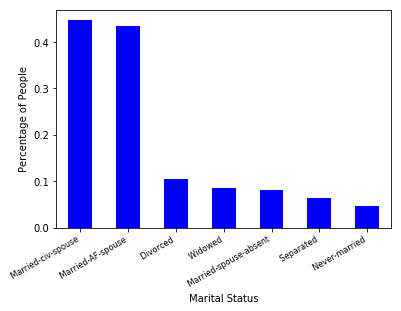

In [12]:
ax_ms = ms_calc.plot(kind="bar", color="b")
ax_ms.set_xticklabels(ms_calc.index, rotation=30, ha="right", fontsize=8)
ax_ms.set_xlabel("Marital Status")
ax_ms.set_ylabel("Percentage of People")

### Conclusion: Married people earn more money compared to non-married people. 